### Imports

In [97]:
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
from utils.utils import *

import hdbscan
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import sys

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2 ms (started: 2023-05-28 16:09:17 -05:00)


### Parameters

In [98]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

method = params["method"][params["method_idx"]]
print("Method:\t\t", method)

group = params["group"][params["group_idx"]]
print("Group:\t\t", group)

subgroups = [str(k + 1) for k in range(group[1])]
print("Subgroup:\t", subgroups)

dimensions = params["dimensions"]
dimension = dimensions[0]
print("Dimensions:\t", dimensions)

/home/ealvarez/Project/GNN_Filter
Method:		 vgae
Group:		 ['pck1^', 2]
Subgroup:	 ['1', '2']
Dimensions:	 [3]
time: 3.17 ms (started: 2023-05-28 16:09:17 -05:00)


### Read graphs

In [99]:
# GNN method STD
df_edge_embeddings_join_filter_count_weight_std_avg = pd.read_csv("{}/output_edges/edges_filter_weight_std_avg/{}_{}_edge-filter-weight-std-avg_{}_{}.csv".format(dir, method, group[0], dimension, "L2"))
df_edge_embeddings_join_filter_count_weight_std_avg

G = nx.from_pandas_edgelist(df_edge_embeddings_join_filter_count_weight_std_avg, "source", "target", edge_attr=["weight"])
graph_detail(G)

Num. nodes: 5261
Num. edges: 426354

time: 834 ms (started: 2023-05-28 16:09:17 -05:00)


In [100]:
# Greedy STD
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-std.csv".format(dir, group[0]))

G11 = nx.from_pandas_edgelist(df_edges_filter, "source", "target", edge_attr=["weight"])
graph_detail(G11)

Num. nodes: 5677
Num. edges: 732148

time: 1.44 s (started: 2023-05-28 16:09:18 -05:00)


In [101]:
# Greedy STD-ANOVA
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-std-anova.csv".format(dir, group[0]))

G12 = nx.from_pandas_edgelist(df_edges_filter, "source", "target", edge_attr=["weight"])
graph_detail(G12)

Num. nodes: 4650
Num. edges: 473179

time: 946 ms (started: 2023-05-28 16:09:20 -05:00)


In [102]:
# Greedy ANOVA
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-anova.csv".format(dir, group[0]))

G21 = nx.from_pandas_edgelist(df_edges_filter, "source", "target")
graph_detail(G21)

Num. nodes: 4673
Num. edges: 524843

time: 616 ms (started: 2023-05-28 16:09:21 -05:00)


In [103]:
# Greedy ANOVA-STD
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-anova-std.csv".format(dir, group[0]))

G22 = nx.from_pandas_edgelist(df_edges_filter, "source", "target", edge_attr=["weight"])
graph_detail(G22)

Num. nodes: 4650
Num. edges: 473179

time: 926 ms (started: 2023-05-28 16:09:21 -05:00)


### Get common edges

STD

Nodes:
Greedy & vgae: 5261
Greedy - vgae: 416
vgae - Greedy: 0
Edges:
Greedy & vgae: 426354
Greedy - vgae: 305794
vgae - Greedy: 0


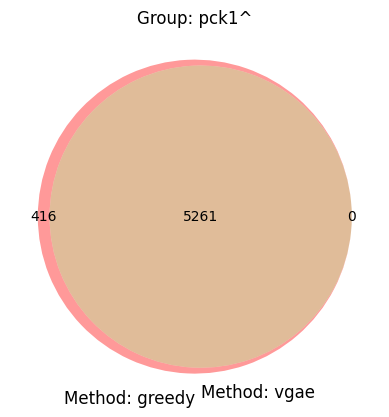

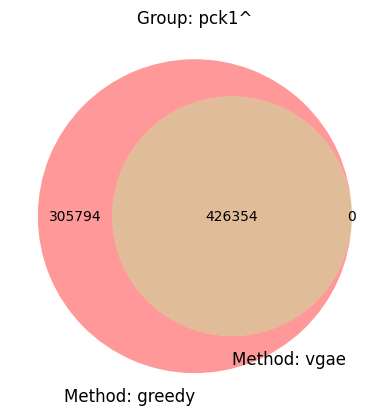

time: 1.47 s (started: 2023-05-28 16:09:29 -05:00)


In [104]:
common_nodes_edges = get_common_nodes_edges(G11, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

STD-ANOVA

Nodes:
Greedy & vgae: 4294
Greedy - vgae: 356
vgae - Greedy: 967
Edges:
Greedy & vgae: 250389
Greedy - vgae: 222790
vgae - Greedy: 175965


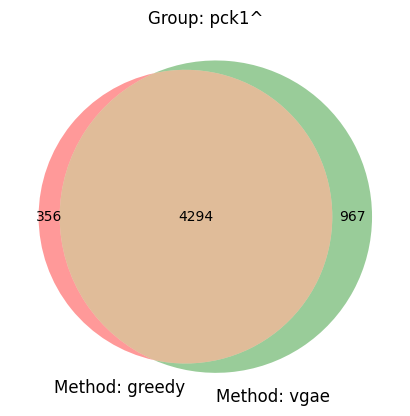

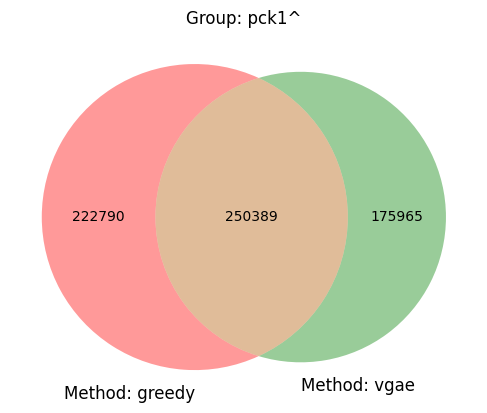

time: 1.23 s (started: 2023-05-28 16:09:31 -05:00)


In [105]:
common_nodes_edges = get_common_nodes_edges(G12, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

ANOVA

Nodes:
Greedy & vgae: 4297
Greedy - vgae: 376
vgae - Greedy: 964
Edges:
Greedy & vgae: 250389
Greedy - vgae: 274454
vgae - Greedy: 175965


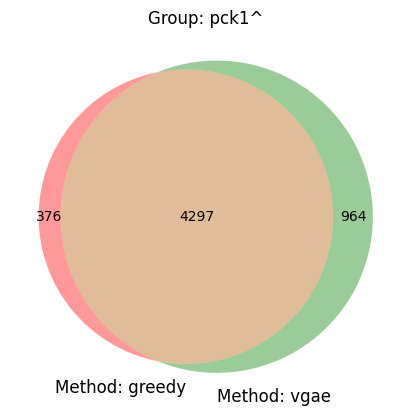

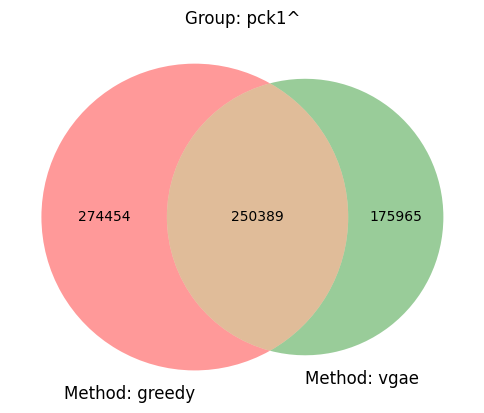

time: 1.35 s (started: 2023-05-28 16:09:34 -05:00)


In [106]:
common_nodes_edges = get_common_nodes_edges(G21, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

ANOVA-STD

Nodes:
Greedy & vgae: 4294
Greedy - vgae: 356
vgae - Greedy: 967
Edges:
Greedy & vgae: 250389
Greedy - vgae: 222790
vgae - Greedy: 175965


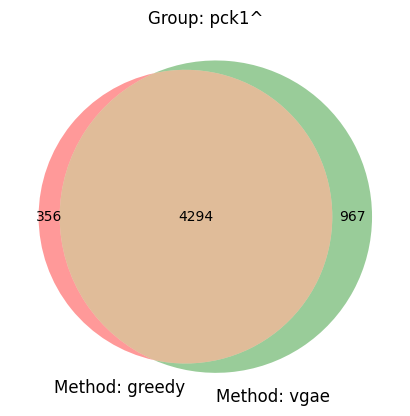

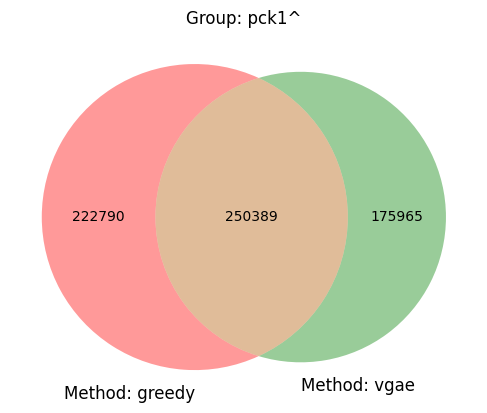

time: 1.32 s (started: 2023-05-28 16:09:35 -05:00)


In [107]:
common_nodes_edges = get_common_nodes_edges(G22, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()